# Ejercicio 1: Introducción a Recuperación de Información
### Nombre: Elias Bolaños
### Curso: GR1CC
## Objetivo de la práctica
- Entender el problema de **buscar información** en colecciones de texto.
- Comprender por qué se necesita un **índice invertido** en recuperación de información.
- Programar una primera solución manual y luego optimizarla con un índice.
- Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.

## Parte 1: Búsqueda lineal en documentos

### Actividad
1. Se te proporcionará un conjunto de documentos de texto.
2. Escribe una función que:
   - Lea todos los documentos.
   - Busque una palabra ingresada por el usuario.
   - Muestre en qué documentos aparece la palabra.

In [18]:
archivo = '01_corpus_turismo_500.txt'
palabra = input("palabra a buscar: ")
with open(archivo, 'r', encoding='utf-8') as f:
    lineas = f.readlines()
encontrado = False
for i, linea in enumerate(lineas, start=1):
    if palabra in linea:
        print(f"El libro numero {i}: {linea.strip()}")
        encontrado = True
if not encontrado:
    print("la palabra no se encontro")



El libro numero 4: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para surf.
El libro numero 16: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
El libro numero 17: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.
El libro numero 39: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para rafting.
El libro numero 43: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para senderismo.
El libro numero 73: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
El libro numero 75: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
El libro numero 89: Quito tiene un centro histórico Patrimonio de la Humanidad
El libro numero 104: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.
El libro numero 136: Quito tiene un centro histórico Patrimonio de la

## Parte 2: Construcción de un índice invertido

### Actividad
1. Escribe un programa que:
   - Recorra todos los documentos.
   - Construya un **índice invertido**, es decir, un diccionario donde:
     - Cada palabra clave apunta a una lista de documentos donde aparece.

2. Escribe una nueva función de búsqueda que:
   - Consulte directamente el índice para encontrar los documentos relevantes.
   - Sea mucho más rápida que la búsqueda lineal.

In [17]:
archivo = '01_corpus_turismo_500.txt'

dictionary = {}
with open(archivo, 'r', encoding='utf-8') as f:
    lineas = f.readlines()
    for i, linea in enumerate(lineas, start=1):
        palabras = linea.strip().split()
        for palabra in palabras:
            if palabra not in dictionary:
                dictionary[palabra] = set()
            dictionary[palabra].add(f"Línea {i}: {linea.strip()}")

entrada = input("Palabras a buscar (separadas por espacio): ")
palabras = entrada.split()

for palabra in palabras:
    if palabra in dictionary:
        print(f"{palabra}:")
        for resultado in sorted(dictionary[palabra]):
            print(f"  {resultado}")
    else:
        print(f"{palabra}: No se encontró")

Quito:
  Línea 104: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.
  Línea 136: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.
  Línea 16: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
  Línea 17: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.
  Línea 201: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.
  Línea 213: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
  Línea 238: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para senderismo.
  Línea 260: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar auténtico para visitar.
  Línea 291: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para rafting.
  Línea 325: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el p

## Parte 3: Evaluación de tiempos de búsqueda
### Actividad

1. Realiza la búsqueda de varias palabras usando:
      -  Corpus pequeño: 16 documentos (turismo en Ecuador).
      -  Corpus grande: 500 documentos (versión ampliada).
2. Mide el tiempo de ejecución:
      -  Para búsqueda lineal.
      -  Para búsqueda usando índice invertido.
      -  Grafica o presenta los resultados en una tabla comparativa.

### Ejemplo de palabras para buscar
- quito
- montañita
- feriado
- playas
- aventura
- galápagos

     Palabra  Lineal (ms)  Índice invertido (ms)
0      quito       0.0831                 0.0040
1  montañita       0.0785                 0.0007
2    feriado       0.0805                 0.0003
3     playas       0.0766                 0.0005
4   aventura       0.0775                 0.0003
5  galápagos       0.0743                 0.0004


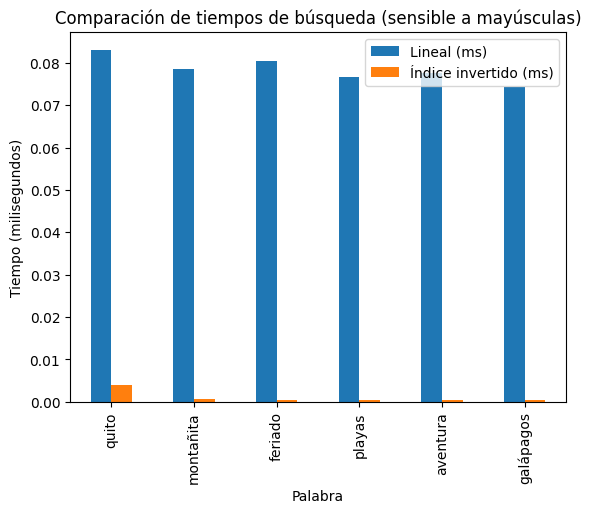

In [16]:
import time
import matplotlib.pyplot as plt
import pandas as pd

archivo = '01_corpus_turismo_500.txt'
palabras_buscar = ["quito", "montañita", "feriado", "playas", "aventura", "galápagos"]

with open(archivo, 'r', encoding='utf-8') as f:
    lineas = f.readlines()

#búsqueda lineal
tiempos_lineal = []
for palabra in palabras_buscar:
    start = time.perf_counter()
    encontrado = False
    for i, linea in enumerate(lineas, start=1):
        if palabra in linea:
            encontrado = True
    end = time.perf_counter()
    tiempos_lineal.append((end - start) * 1000)

#índice invertido
dictionary = {}
for i, linea in enumerate(lineas, start=1):
    palabras = linea.strip().split()
    for palabra in palabras:
        if palabra not in dictionary:
            dictionary[palabra] = []
        dictionary[palabra].append(f"Línea {i}: {linea.strip()}")

tiempos_indice = []
for palabra in palabras_buscar:
    start = time.perf_counter()
    _ = dictionary.get(palabra, [])
    end = time.perf_counter()
    tiempos_indice.append((end - start) * 1000)

df = pd.DataFrame({
    "Palabra": palabras_buscar,
    "Lineal (ms)": tiempos_lineal,
    "Índice invertido (ms)": tiempos_indice
})
print(df)
df.plot(x="Palabra", y=["Lineal (ms)", "Índice invertido (ms)"], kind="bar")
plt.ylabel("Tiempo (milisegundos)")
plt.title("Comparación de tiempos de búsqueda (sensible a mayúsculas)")
plt.show()

## Parte 4:
### Actividad
1. Modifica el índice para que ignore mayúsculas/minúsculas (por ejemplo, "Playa" y "playa" deben considerarse iguales).
2. Permite consultas de múltiples términos (ejemplo: buscar documentos que contengan "playa" y "turismo").
3. Calcula el _speedup_

In [15]:
import time

archivo = '01_corpus_turismo_500.txt'
dictionary = {}
with open(archivo, 'r', encoding='utf-8') as f:
    lineas = f.readlines()
    for i, linea in enumerate(lineas, start=1):
        palabras = linea.strip().split()
        for palabra in palabras:
            palabra = palabra.lower()
            if palabra not in dictionary:
                dictionary[palabra] = []
            dictionary[palabra].append(f"Línea {i}: {linea.strip()}")

entrada = input("palabras a buscar (separadas por espacio): ")
palabras = entrada.lower().split()

#índice invertido
t1 = time.perf_counter()
if palabras:
    resultado = set(dictionary.get(palabras[0], []))
    for palabra in palabras[1:]:
        resultado = resultado & set(dictionary.get(palabra, []))
else:
    resultado = set()
t2 = time.perf_counter()

if resultado:
    print("líneas donde aparecen todas las palabras:")
    for res in sorted(resultado):
        print(res)
else:
    print("no se encontraron líneas con todas las palabras.")

print(f"tiempo con índice invertido: {(t2-t1)*1000:.4f} ms")

#búsqueda lineal
t3 = time.perf_counter()
resultado_lineal = set()
for i, linea in enumerate(lineas, start=1):
    if all(palabra in linea.lower() for palabra in palabras):
        resultado_lineal.add(f"Línea {i}: {linea.strip()}")
t4 = time.perf_counter()
print(f"tiempo con búsqueda lineal: {(t4-t3)*1000:.4f} ms")
if (t2-t1) > 0:
    print(f"speedup: {(t4-t3)/(t2-t1):.2f}x")
else:
    print("speedup: infinito (índice demasiado rápido)")

líneas donde aparecen todas las palabras:
Línea 104: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.
Línea 136: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.
Línea 16: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
Línea 17: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.
Línea 201: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.
Línea 213: Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.
Línea 238: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para senderismo.
Línea 260: Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar auténtico para visitar.
Línea 291: Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para rafting.
Línea 325: Quito tiene un centro histórico Patrimonio de la Humanidad 